<a href="https://colab.research.google.com/github/Sreyas2403/StockAnalysis_Patterns-Indicators/blob/main/15_75_125mindata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance nsepython


In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock symbol
symbol = "SBIN.NS"  # Yahoo Finance uses the .NS suffix for NSE stocks

# Fetch intraday data for the last 60 days with a 15-minute interval
data_15m = yf.download(tickers=symbol, period='1mo', interval='15m')

# Ensure the index is a DatetimeIndex
data_15m.index = pd.to_datetime(data_15m.index)

# Function to resample data
def resample_data(df, timeframe):
    resampled_df = df.resample(timeframe).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Adj Close': 'last',
        'Volume': 'sum'
    }).dropna()
    return resampled_df

# Resample data to 75-minute and 125-minute intervals
data_75m = resample_data(data_15m, '75T')
data_125m = resample_data(data_15m, '125T')

# Print the first few rows of each dataframe to check the data
print("15-minute interval data:")
print(data_15m.head())

print("\n75-minute interval data:")
print(data_75m.head())

print("\n125-minute interval data:")
print(data_125m.head())

#save the data to CSV files
data_15m.to_csv('sbin_15m.csv')
data_75m.to_csv('sbin_75m.csv')
data_125m.to_csv('sbin_125m.csv')


[*********************100%%**********************]  1 of 1 completed

15-minute interval data:
                           Open        High         Low       Close  \
Datetime                                                              
2024-05-08 09:15:00  802.599976  807.799988  799.950012  804.549988   
2024-05-08 09:30:00  804.349976  808.900024  803.500000  807.049988   
2024-05-08 09:45:00  806.700012  811.000000  806.049988  809.049988   
2024-05-08 10:00:00  809.049988  810.799988  807.299988  808.599976   
2024-05-08 10:15:00  808.299988  812.650024  806.200012  806.950012   

                      Adj Close   Volume  
Datetime                                  
2024-05-08 09:15:00  804.549988   885433  
2024-05-08 09:30:00  807.049988  1034777  
2024-05-08 09:45:00  809.049988  1176729  
2024-05-08 10:00:00  808.599976  1221961  
2024-05-08 10:15:00  806.950012   906436  

75-minute interval data:
                           Open        High         Low       Close  \
Datetime                                                              
2024-05-

In [ ]:
import pandas as pd
import yfinance as yf
import datetime

# Define the stock symbol
symbol = "SBIN.NS"

# Calculate the start and end dates for the last 59 days
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=59)

# Define a function to fetch and resample data
def fetch_and_resample(symbol, interval):
    # Fetch intraday data using yfinance
    df = yf.download(tickers=symbol, start=start_date, end=end_date, interval='15m')

    # Ensure the index is a DatetimeIndex
    df.index = pd.to_datetime(df.index)

    # Resample the data to the required interval
    df_resampled = df.resample(interval).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()

    return df_resampled

# Fetch and resample the data
data_15m = fetch_and_resample(symbol, '15T')
data_75m = fetch_and_resample(symbol, '75T')
data_125m = fetch_and_resample(symbol, '125T')

# Print the first few rows of each dataframe to check the data
print("15-minute interval data:")
print(data_15m.head())
print(data_15m.tail())
print("---")

print("\n75-minute interval data:")
print(data_75m.head())
print(data_75m.tail())
print("---")

print("\n125-minute interval data:")
print(data_125m.head())
print(data_125m.tail())
print("---")

# Saving the data to CSV files
data_15m.to_csv(f'{symbol}_15m.csv')
data_75m.to_csv(f'{symbol}_75m.csv')
data_125m.to_csv(f'{symbol}_125m.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

15-minute interval data:
                           Open        High         Low       Close   Volume
Datetime                                                                    
2024-04-12 09:15:00  778.000000  778.599976  774.750000  776.450012   552243
2024-04-12 09:30:00  776.250000  779.500000  774.500000  775.400024  1077424
2024-04-12 09:45:00  775.200012  777.799988  775.000000  776.400024   638043
2024-04-12 10:00:00  776.599976  777.000000  775.000000  776.500000   534388
2024-04-12 10:15:00  776.500000  776.599976  774.599976  775.200012   534642
                           Open        High         Low       Close   Volume
Datetime                                                                    
2024-06-07 14:15:00  824.500000  828.799988  824.250000  826.599976  1267813
2024-06-07 14:30:00  826.549988  827.250000  825.599976  826.000000  1028952
2024-06-07 14:45:00  825.750000  829.549988  825.750000  829.349976  1623211
2024-06-07 15:00:00  829.299988  830.950012  828.75

In [ ]:
import pandas as pd
import yfinance as yf
import datetime

# Define the stock symbol
symbol = "SBIN.NS"

# Calculate the start and end dates for the last 59 days
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=59)

# Define a function to fetch and resample data
def fetch_and_resample(symbol, interval):
    # Fetch intraday data using yfinance
    df = yf.download(tickers=symbol, start=start_date, end=end_date, interval='15m')

    # Ensure the index is a DatetimeIndex
    df.index = pd.to_datetime(df.index)

    # Resample the data to the required interval
    df_resampled = df.resample(interval).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()

    return df_resampled

# Fetch and resample the data
data_15m = fetch_and_resample(symbol, '15T')
data_75m = fetch_and_resample(symbol, '75T')
data_125m = fetch_and_resample(symbol, '125T')

# Group the 15-minute data into groups of 5 entries
data_15m['Group'] = (data_15m.index.to_series().diff().dt.total_seconds().fillna(0) / (15 * 60)).cumsum().floordiv(5)

# Print the required information for the first group
first_group = data_15m[data_15m['Group'] == 0]
opening_price_first_5 = first_group['Open'].iloc[0]
closing_price_last_5 = first_group['Close'].iloc[-1]
max_highest_price_first_5 = first_group['High'].max()
min_lowest_price_first_5 = first_group['Low'].min()

# Print the required information
print("15-minute interval data (first 5 entries):")
print(first_group)
print("\nOpening Price of 1st five entries (head):")
print(opening_price_first_5)
print("\nClosing Price of last five entries (tail):")
print(closing_price_last_5)
print("\nMaximum Highest Price of 1st five entries:")
print(max_highest_price_first_5)
print("\nMinimum Lowest Price of 1st five entries:")
print(min_lowest_price_first_5)
print("---")

print("15-minute interval data:")
print(data_15m.head())
print(data_15m.tail())
print("---")

print("\n75-minute interval data:")
print(data_75m.head())
print(data_75m.tail())
print("---")

print("\n125-minute interval data:")
print(data_125m.head())
print(data_125m.tail())
print("---")

# Saving the data to CSV files
data_15m.to_csv(f'{symbol}_15m.csv')
data_75m.to_csv(f'{symbol}_75m.csv')
data_125m.to_csv(f'{symbol}_125m.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


15-minute interval data (first 5 entries):
                           Open        High         Low       Close   Volume  \
Datetime                                                                       
2024-04-22 09:15:00  754.849976  757.799988  752.849976  753.500000  1004287   
2024-04-22 09:30:00  753.750000  754.200012  751.049988  752.700012   510785   
2024-04-22 09:45:00  752.750000  754.450012  752.099976  753.950012   317719   
2024-04-22 10:00:00  753.750000  754.849976  752.049988  753.549988   251493   
2024-04-22 10:15:00  753.549988  755.000000  752.099976  752.599976   201737   

                     Group  
Datetime                    
2024-04-22 09:15:00    0.0  
2024-04-22 09:30:00    0.0  
2024-04-22 09:45:00    0.0  
2024-04-22 10:00:00    0.0  
2024-04-22 10:15:00    0.0  

Opening Price of 1st five entries (head):
754.8499755859375

Closing Price of last five entries (tail):
752.5999755859375

Maximum Highest Price of 1st five entries:
757.7999877929688

Minimum

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock ticker and period
ticker = "SBIN.NS"
period = "59d"

# Define the timeframes
timeframes = [
    ("15min", 15),
    ("75min", 75),
    ("125min", 125)
]

# Download and process data for each timeframe
for timeframe, interval in timeframes:
    data = yf.download(tickers=ticker, period=period, interval=f"{interval}m")
    data.reset_index(inplace=True)
    data.rename(columns={"index": "Datetime"}, inplace=True)
    data["Datetime"] = pd.to_datetime(data["Datetime"])
    data.set_index("Datetime", inplace=True)
    print(f"Data for {timeframe} timeframe:")
    print(data.head())
    print(data.tail())
    print(data)
    print("---")

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SBIN.NS']: YFInvalidPeriodError("%ticker%: Period '59d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


KeyError: 'Datetime'

In [ ]:
#grouping for 15min(5), 75min(15), 125min(25)
import pandas as pd
import yfinance as yf
import datetime

# Define the stock symbol
symbol = "SBIN.NS"

# Calculate the start and end dates for the last 59 days
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=59)

# Define a function to fetch and resample data
def fetch_and_resample(symbol, interval):
    # Fetch intraday data using yfinance
    df = yf.download(tickers=symbol, start=start_date, end=end_date, interval='15m')

    # Ensure the index is a DatetimeIndex
    df.index = pd.to_datetime(df.index)

    # Resample the data to the required interval
    df_resampled = df.resample(interval).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()

    return df_resampled

# Fetch and resample the data
data_15m = fetch_and_resample(symbol, '15T')
data_75m = fetch_and_resample(symbol, '75T')
data_125m = fetch_and_resample(symbol, '125T')

# Group the 15-minute data into groups of 5 entries
data_15m['Group'] = (data_15m.index.to_series().diff().dt.total_seconds().fillna(0) / (15 * 60)).cumsum().floordiv(5)
data_75m['Group'] = (data_15m.index.to_series().diff().dt.total_seconds().fillna(0) / (15 * 60)).cumsum().floordiv(15)
data_125m['Group'] = (data_15m.index.to_series().diff().dt.total_seconds().fillna(0) / (15 * 60)).cumsum().floordiv(25)

# Print the required information for the first group
first_group = data_15m.head(5)
last_group = data_15m.tail(5)

opening_prices_first_5 = first_group['Open']
closing_prices_last_5 = last_group['Close']
max_highest_price_first_5 = first_group['High'].max()
min_lowest_price_first_5 = first_group['Low'].min()

#75min
first_group75 = data_75m.head(15)
last_group75 = data_15m.tail(15)
opening_prices_first_75 = first_group75['Open']
closing_prices_last_75 = last_group75['Close']
max_highest_price_first_75m = first_group75['High'].max()
min_lowest_price_first_75m = first_group75['Low'].min()

#125min
first_group125 = data_125m.head(25)
last_group125 = data_125m.tail(25)
opening_prices_first_125 = first_group125['Open']
closing_prices_last_125 = last_group125['Close']
max_highest_price_first_125m = first_group125['High'].max()
min_lowest_price_first_125m = first_group125['Low'].min()

# Print the required information
print("15-minute interval data (first 5 entries):")
print(first_group)
print("\nOpening Prices of 1st five entries (head):")
print(opening_prices_first_5)
print("\nClosing Prices of last five entries (tail):")
print(closing_prices_last_5)
print("\nMaximum Highest Price of 1st five entries:")
print(max_highest_price_first_5)
print("\nMinimum Lowest Price of 1st five entries:")
print(min_lowest_price_first_5)


print("15-minute interval data:")
print(data_15m.head())
print(data_15m.tail())
print("---")

print("75-minute interval data (first 15 entries):")
print(first_group75)
print("\nOpening Prices of 1st fifteen entries (head):")
print(opening_prices_first_75)
print("\nClosing Prices of last fifteen entries (tail):")
print(closing_prices_last_75)
print("\nMaximum Highest Price of 1st 15 entries:")
print(max_highest_price_first_75m)
print("\nMinimum Lowest Price of 1st 15 entries:")
print(min_lowest_price_first_75m)

print("\n75-minute interval data:")
print(data_75m.head())
print(data_75m.tail())
print("---")

print("125-minute interval data (first 25 entries):")
print(first_group125)
print("\nOpening Prices of 1st 25 entries (head):")
print(opening_prices_first_125)
print("\nClosing Prices of last 25 entries (tail):")
print(closing_prices_last_125)
print("\nMaximum Highest Price of 1st 25 entries:")
print(max_highest_price_first_125m)
print("\nMinimum Lowest Price of 1st 25 entries:")
print(min_lowest_price_first_125m)
print("\n125-minute interval data:")
print(data_125m.head())
print(data_125m.tail())
print("---")

# Saving the data to CSV files
data_15m.to_csv(f'{symbol}_15m.csv')
data_75m.to_csv(f'{symbol}_75m.csv')
data_125m.to_csv(f'{symbol}_125m.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

15-minute interval data (first 5 entries):
                           Open        High         Low       Close   Volume  \
Datetime                                                                       
2024-04-22 09:15:00  754.849976  757.799988  752.849976  753.500000  1004287   
2024-04-22 09:30:00  753.750000  754.200012  751.049988  752.700012   510785   
2024-04-22 09:45:00  752.750000  754.450012  752.099976  753.950012   317719   
2024-04-22 10:00:00  753.750000  754.849976  752.049988  753.549988   251493   
2024-04-22 10:15:00  753.549988  755.000000  752.099976  752.599976   201737   

                     Group  
Datetime                    
2024-04-22 09:15:00    0.0  
2024-04-22 09:30:00    0.0  
2024-04-22 09:45:00    0.0  
2024-04-22 10:00:00    0.0  
2024-04-22 10:15:00    0.0  

Opening Prices of 1st five entries (head):
Datetime
2024-04-22 09:15:00    754.849976
2024-04-22 09:30:00    753.750000
2024-04-22 09:45:00    752.750000
2024-04-22 10:00:00    753.750000
2024

Enter stock symbol: SBIN
Enter start date (dd-mm-yyyy): 01-01-2023
Enter end date (dd-mm-yyyy): 31-12-2023
Peak and Valley Information:
Date: 2023-01-03 00:00:00, Close: 612.40, RSI: nan
Date: 2023-01-06 00:00:00, Close: 600.65, RSI: nan
Date: 2023-01-16 00:00:00, Close: 603.00, RSI: nan
Date: 2023-01-27 00:00:00, Close: 539.95, RSI: 17.50
Date: 2023-02-06 00:00:00, Close: 545.40, RSI: 35.24
Date: 2023-02-08 00:00:00, Close: 549.75, RSI: 38.03
Date: 2023-02-10 00:00:00, Close: 553.05, RSI: 40.30
Date: 2023-02-14 00:00:00, Close: 540.85, RSI: 35.97
Date: 2023-02-21 00:00:00, Close: 523.45, RSI: 29.18
Date: 2023-02-28 00:00:00, Close: 522.80, RSI: 34.65
Date: 2023-03-10 00:00:00, Close: 547.35, RSI: 49.86
Date: 2023-03-15 00:00:00, Close: 517.55, RSI: 36.84
Date: 2023-03-22 00:00:00, Close: 521.55, RSI: 41.17
Date: 2023-03-24 00:00:00, Close: 505.35, RSI: 34.04
Date: 2023-03-31 00:00:00, Close: 523.75, RSI: 47.59
Date: 2023-04-11 00:00:00, Close: 532.10, RSI: 53.17
Date: 2023-04-19 00:00

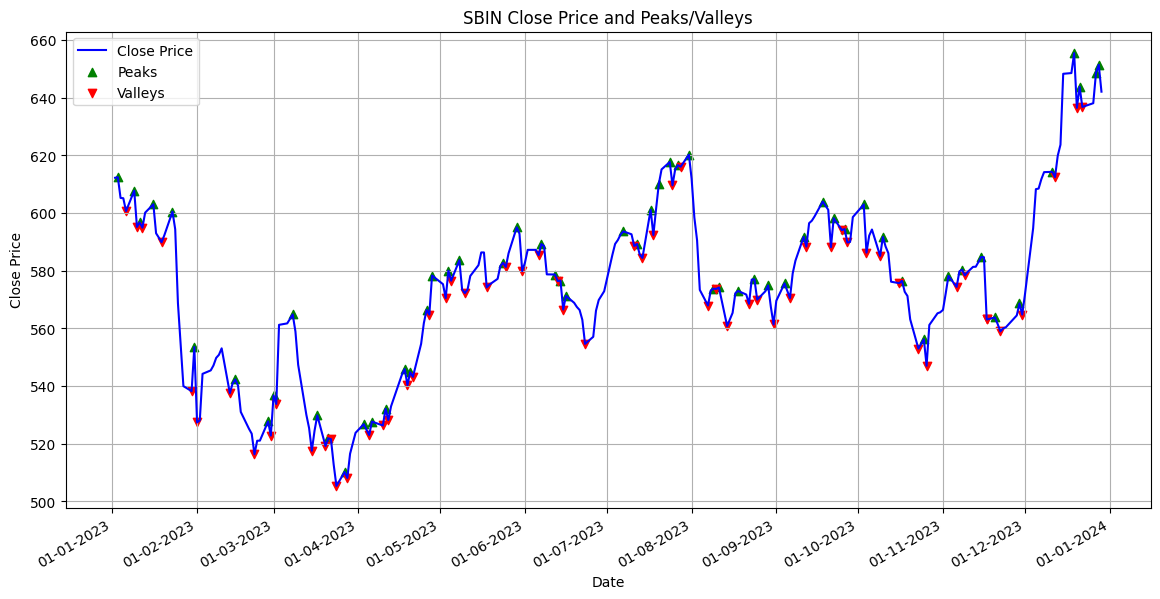

In [ ]:
import nsepython as nse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
import matplotlib.dates as mdates

# Define the stock symbol and interval
symbol = input("Enter stock symbol: ")
series = "EQ"
start_date = input("Enter start date (dd-mm-yyyy): ")
end_date = input("Enter end date (dd-mm-yyyy): ")

# Fetch equity history for the selected symbol
equity_data = nse.equity_history(symbol, series, start_date, end_date)
stock_df = pd.DataFrame(equity_data)
stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
stock_df = stock_df.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE'])

# Calculate RSI
rsi_period = 14
stock_df['RSI'] = RSIIndicator(close=stock_df['CH_CLOSING_PRICE'], window=rsi_period).rsi()

# Function to identify peaks and valleys
def identify_peaks_and_valleys(prices):
    peaks = []
    valleys = []
    for i in range(1, len(prices) - 1):
        if prices[i] > prices[i - 1] and prices[i] > prices[i + 1]:
            peaks.append(i)
        elif prices[i] < prices[i - 1] and prices[i] < prices[i + 1]:
            valleys.append(i)
    return peaks, valleys

# Identify peaks and valleys
peaks, valleys = identify_peaks_and_valleys(stock_df['CH_CLOSING_PRICE'])

# Extract closing price and RSI value at each peak and valley
peak_valley_info = {}
for idx in peaks + valleys:
    date = stock_df['mTIMESTAMP'].iloc[idx]
    peak_valley_info[date] = {
        'Close': stock_df['CH_CLOSING_PRICE'].iloc[idx],
        'RSI': stock_df['RSI'].iloc[idx]
    }

# Print the dictionary containing peaks and valleys with their closing prices and RSI values
print("Peak and Valley Information:")
for date, info in peak_valley_info.items():
    print(f"Date: {date}, Close: {info['Close']:.2f}, RSI: {info['RSI']:.2f}")

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Close Price', color='blue')

# Highlight peaks and valleys
plt.scatter(stock_df['mTIMESTAMP'][peaks], stock_df['CH_CLOSING_PRICE'][peaks], color='green', marker='^', alpha=1, label='Peaks')
plt.scatter(stock_df['mTIMESTAMP'][valleys], stock_df['CH_CLOSING_PRICE'][valleys], color='red', marker='v', alpha=1, label='Valleys')

plt.title(f'{symbol} Close Price and Peaks/Valleys')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()

# Formatting the dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()


Enter stock symbol: SBIN
Enter start date (dd-mm-yyyy): 01-01-2021
Enter end date (dd-mm-yyyy): 31-12-2023
{'data': [{'_id': '63d7a8caec6af300077ba28b', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 397.9, 'CH_TRADE_LOW_PRICE': 388, 'CH_OPENING_PRICE': 394.05, 'CH_CLOSING_PRICE': 392.25, 'CH_LAST_TRADED_PRICE': 393.15, 'CH_PREVIOUS_CLS_PRICE': 394.8, 'CH_TOT_TRADED_QTY': 54163507, 'CH_TOT_TRADED_VAL': 21268236419.55, 'CH_52WEEK_HIGH_PRICE': 408.35, 'CH_52WEEK_LOW_PRICE': 149.45, 'CH_TOTAL_TRADES': 395057, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2021-02-10', 'TIMESTAMP': '2021-02-09T18:30:00.000Z', 'createdAt': '2023-01-30T11:23:54.167Z', 'updatedAt': '2023-01-30T11:23:54.167Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 392.67, 'mTIMESTAMP': '10-Feb-2021'}, {'_id': '63d7a8baec06e30007fc0333', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 403.5, 'CH_TRADE_LOW_PRICE': 389, 'CH_OPENING_PRICE': 396.75, 'CH_CL

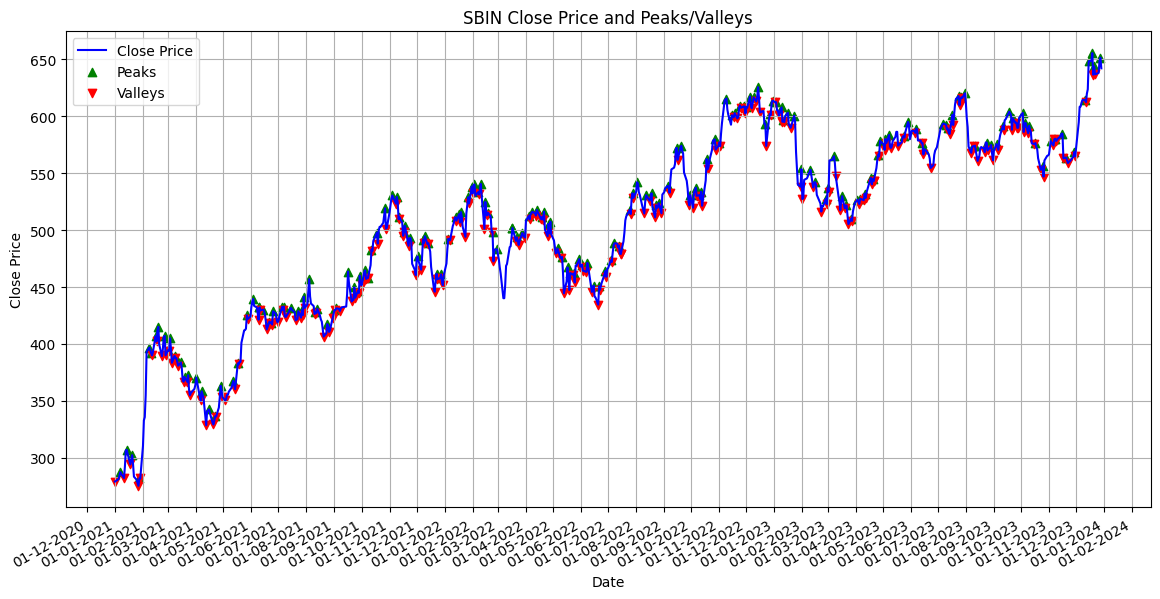

In [ ]:
import nsepython as nse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
import matplotlib.dates as mdates

# Define the stock symbol and interval
symbol = input("Enter stock symbol: ")
series = "EQ"
start_date = input("Enter start date (dd-mm-yyyy): ")
end_date = input("Enter end date (dd-mm-yyyy): ")

# Fetch equity history for the selected symbol
equity_data = nse.equity_history(symbol, series, start_date, end_date)
stock_df = pd.DataFrame(equity_data)
stock_df['mTIMESTAMP'] = pd.to_datetime(stock_df['mTIMESTAMP'])
stock_df = stock_df.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
stock_df['CH_CLOSING_PRICE'] = pd.to_numeric(stock_df['CH_CLOSING_PRICE'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
stock_df = stock_df.dropna(subset=['CH_CLOSING_PRICE'])

# Function to identify peaks and valleys
def identify_peaks_and_valleys(prices):
    peaks = []
    valleys = []
    for i in range(1, len(prices) - 1):
        if prices[i] > prices[i - 1] and prices[i] > prices[i + 1]:
            peaks.append(i)
        elif prices[i] < prices[i - 1] and prices[i] < prices[i + 1]:
            valleys.append(i)
    return peaks, valleys

# Identify peaks and valleys
peaks, valleys = identify_peaks_and_valleys(stock_df['CH_CLOSING_PRICE'])

# Extract closing price and RSI value at each peak and valley
peak_valley_info = {}
for idx in peaks + valleys:
    date = stock_df['mTIMESTAMP'].iloc[idx]
    peak_valley_info[date] = {
        'Close': stock_df['CH_CLOSING_PRICE'].iloc[idx],
    }

# Print the dictionary containing peaks and valleys with their closing prices and RSI values
print("Peak and Valley Information:")
for date, info in peak_valley_info.items():
    print(f"Date: {date}, Close: {info['Close']:.2f}")

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(stock_df['mTIMESTAMP'], stock_df['CH_CLOSING_PRICE'], label='Close Price', color='blue')

# Highlight peaks and valleys
plt.scatter(stock_df['mTIMESTAMP'][peaks], stock_df['CH_CLOSING_PRICE'][peaks], color='green', marker='^', alpha=1, label='Peaks')
plt.scatter(stock_df['mTIMESTAMP'][valleys], stock_df['CH_CLOSING_PRICE'][valleys], color='red', marker='v', alpha=1, label='Valleys')

plt.title(f'{symbol} Close Price and Peaks/Valleys')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()

# Formatting the dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
!pip install nsepython  ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=34f90c21cf98ea47b5c73fd7826d645dc3828da4824e1ab815b7600fafd597b7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
